This notebook Loads the already fitted model on the prediction set to view sample dataset CNN Model. 

Input: already trained model and prediction dataset. Variable value of delta time is the reaction time, based on which the model is loaded and executed.

Possible values of delta time are: 0.1,0.2,0.3,0.5,1,2,4. These would exist only when the corresponding Save Model for various Reaction Times-* notebook has ben executed. 

Output: Various Models in Scripts Folder. Various files for train, test, prediction samples in Data folder. 

In [12]:
import pandas as pd
import numpy as np
import FileProcessing
import ModelClass

In [13]:
file=FileProcessing.FileProcessing()
model_obj=ModelClass.ModelClass()

In [14]:
model_name='knn'
delta_time=0.2

In [15]:
file_name='Plot_Pairs_NGSIM_Data'
trajectory_display=file.read_input(file_name)

File Read Complete: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data/Plot_Pairs_NGSIM_Data.csv


In [16]:
unique_vehicle_combinations=trajectory_display['Vehicle_combination'].unique()
print(unique_vehicle_combinations[0])
print(unique_vehicle_combinations[1])
print(unique_vehicle_combinations[2])

Car-Heavy Vehicle
Heavy Vehicle-Car
Car-Car


In [17]:
print(trajectory_display.groupby(['Vehicle_combination','L-F_Pair'])['Vehicle_ID'].nunique())

Vehicle_combination  L-F_Pair 
Car-Car              1304-1309    1
                     1635-1642    1
                     439-444      1
Car-Heavy Vehicle    2322-2330    1
                     2725-2717    1
                     2785-2804    1
Heavy Vehicle-Car    2695-2725    1
                     3084-3094    1
                     551-560      1
Name: Vehicle_ID, dtype: int64


In [18]:

target_variable = 'nextframeAcc'
model =file.read_model(model_name,delta_time)
predict_data=model_obj.prediction_preprocessing(trajectory_display,delta_time)

Model Load Completed: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data/knn0.2.pkg


In [19]:

predict_on_pair = model_obj.prediction_test_pairs(trajectory_display, 0, 11)
print(predict_on_pair[0])
print(predict_on_pair[1])
print(predict_on_pair[2])
print(predict_on_pair[3])
print(predict_on_pair[4])
print(predict_on_pair[5])
print(predict_on_pair[6])
print(predict_on_pair[7])
print(predict_on_pair[8])


2322-2330
551-560
1304-1309
2785-2804
3084-3094
439-444
2695-2725
2725-2717
1635-1642


In [20]:
predict_on_pair = model_obj.prediction_test_pairs(predict_data, 0, 11,unique_vehicle_combinations[0])
print(predict_on_pair)
print(predict_on_pair[0])
print(predict_on_pair[1])
print(predict_on_pair[2])

['2322-2330', '2785-2804', '2725-2717']
2322-2330
2785-2804
2725-2717


In [21]:
predicted_data = model_obj.prediction(predict_data, predict_on_pair, target_variable, model, delta_time)

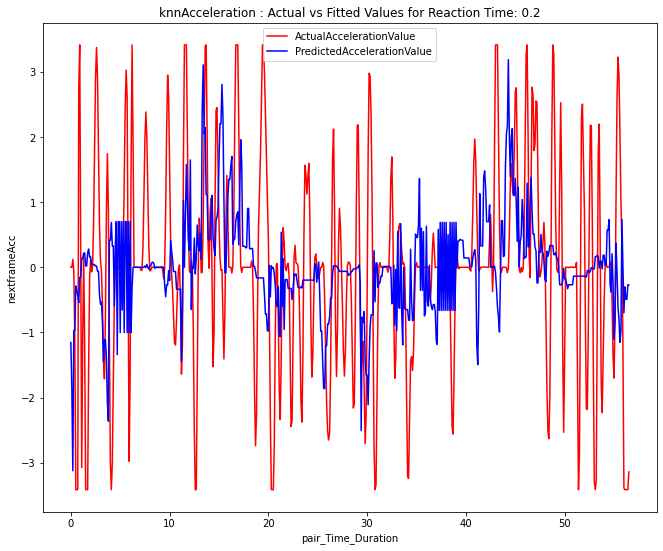

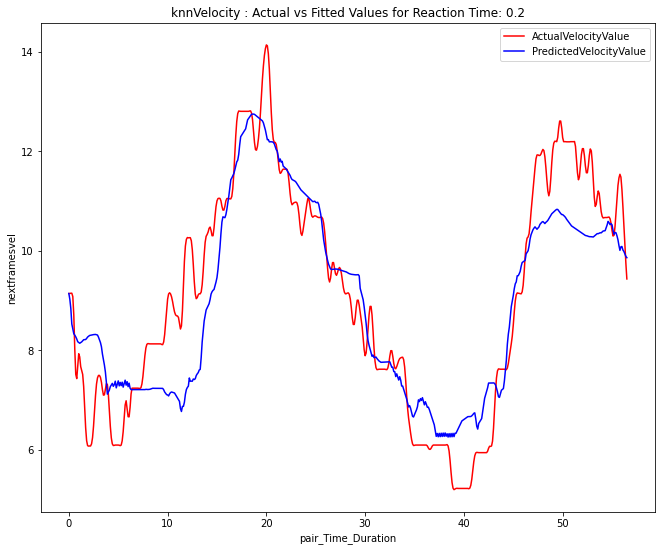

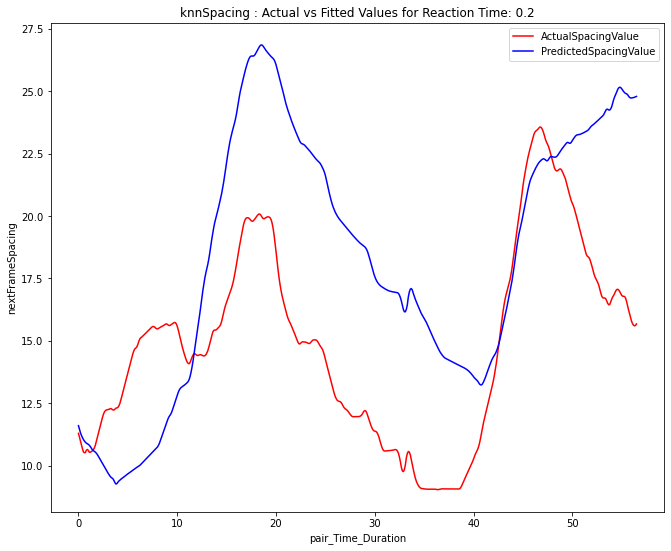

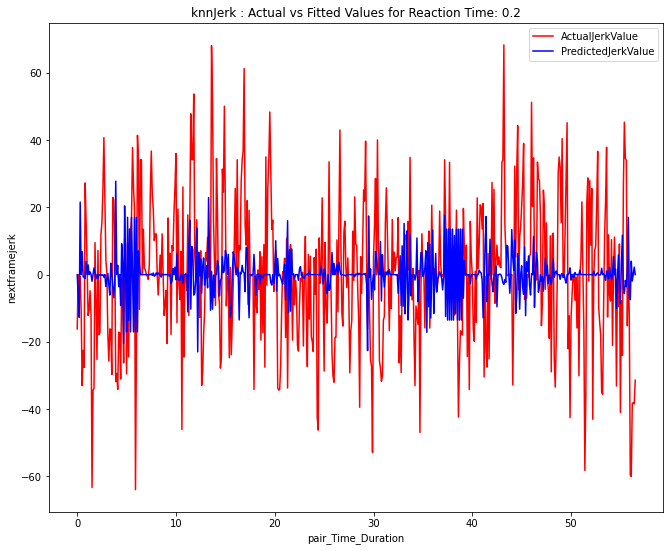

In [22]:
prediction_1 = predicted_data[predicted_data["L-F_Pair"]== predict_on_pair[0]]
model_obj.display_prediction_plots(prediction_1, delta_time, model_name)